In [1]:
'''
캐글(Kaggle)은 2010년에 설립된 예측모델 및 분석 대회 플랫폼이다. 
기업 및 단체에서 데이터와 해결과제를 등록하면, 데이터 과학자들이 이를 해결하는
모델을 개발하고 경쟁하는 플랫폼. 
2017년 3월에 구글에 인수 되었다. 

https://www.kaggle.com/c/titanic/data
'''

'\n캐글(Kaggle)은 2010년에 설립된 예측모델 및 분석 대회 플랫폼이다. \n기업 및 단체에서 데이터와 해결과제를 등록하면, 데이터 과학자들이 이를 해결하는\n모델을 개발하고 경쟁하는 플랫폼. \n2017년 3월에 구글에 인수 되었다. \n\nhttps://www.kaggle.com/c/titanic/data\n'

In [2]:
#라이브러리 불러오기
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [4]:
import seaborn as sns

In [5]:
font= fm.FontProperties(fname=r'C:\Windows\Fonts\gulim.ttc',size=18).get_name()
rc('font',family=font)

In [6]:
#훈련데이타 읽기
df_train = pd.read_csv('./data/titanic_train.csv')

In [7]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
df_train.shape

(891, 12)

In [9]:
'''
PassengerId:승객번호
Survived:생존 여부(0 = No, 1 = Yes)-train 데이터에서만 제공
Pclass:좌석 등급(1 = 1st, 2 = 2nd, 3 = 3rd)
Name:이름
Sex:성별
Age:나이
SibSp: 형제 자매 / 배우자 수
Parch:부모와 자식 수(어떤 아이들은 유모와 탑승했으며, 그 결과 0이 있음)
Ticket:티켓 번호
Fare:티켓 요금
Cabin:객실 번호
Embarked:승선한 항구(C = Cherbourg, Q = Queenstown, S = Southampton)
'''

'\nPassengerId:승객번호\nSurvived:생존 여부(0 = No, 1 = Yes)-train 데이터에서만 제공\nPclass:좌석 등급(1 = 1st, 2 = 2nd, 3 = 3rd)\nName:이름\nSex:성별\nAge:나이\nSibSp: 형제 자매 / 배우자 수\nParch:부모와 자식 수(어떤 아이들은 유모와 탑승했으며, 그 결과 0이 있음)\nTicket:티켓 번호\nFare:티켓 요금\nCabin:객실 번호\nEmbarked:승선한 항구(C = Cherbourg, Q = Queenstown, S = Southampton)\n'

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 결측치 파악하기

In [12]:
df_train.isnull().sum()#행축 즉 수직방향으로 컬럼별 합계

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#생존자의 성별 카운트:여성이 남성보다 2배이상 생존
df_train[df_train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [14]:
#그래프로 각 특성(feature)에 대한 생사 여부(Survived) 확인하기
def visualizationCatplot(x,kind,hue,data):#범주형별로 패턴을 보고자할때 사용하는 함수(x는 범주형 kind는 plot종류)
    if kind == 'count':
        sns.catplot(x=x,kind=kind,hue=hue,data=data)
    else:
        sns.catplot(x=x,y='Survived',kind=kind,hue=hue,data=data)
    plt.show()
        
def visulizationLmplot(x,y,hue,data):#두 수치데이타간의 선형회귀 관계 파악고자할때:x와 y수치형 데이타(선형회귀)
    sns.lmplot(x=x,y=y,hue=hue,data=data)
    plt.show()

In [15]:
df_train['Survivor'] = df_train['Survived'].map({0:'사망',1:'생존'})#Survivor컬럼추가

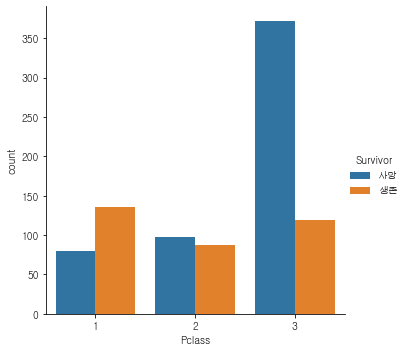

In [16]:
#좌석 등급별 사망/생존자 수 막대 그래프 
#사망한 사람은 3등석이> 2등석 >1등석 순서이고. 생존한 사람의 경우  1등석이 가장 많다
visualizationCatplot('Pclass','count','Survivor',df_train)

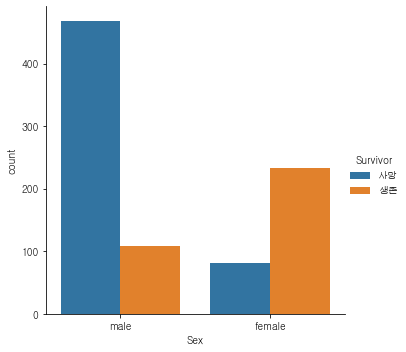

In [17]:
#성별 사망/생존자 수 막대 그래프-남자가 사망율이 높았다 
visualizationCatplot('Sex','count','Survivor',df_train)

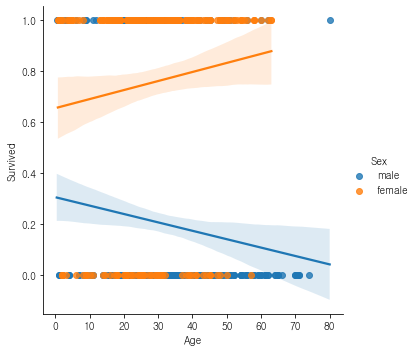

In [18]:
#나이에 따른 성별 생존 여부
#visualizationCatplot(x='Age',kind='strip',hue='Survivor',data=df_train)
#나이사 많을 수록 남성은 생존확률이 낮고 여성은 높다
visulizationLmplot(x='Age',y='Survived',hue='Sex',data=df_train)

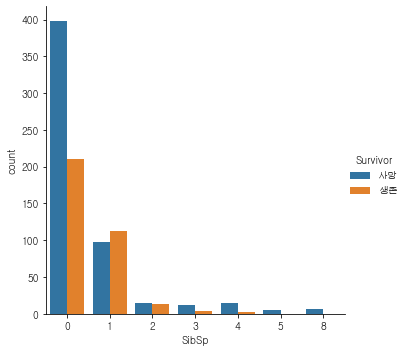

In [19]:
#형제자매수가 적을수록 사망율이 높다
visualizationCatplot('SibSp','count','Survivor',df_train)

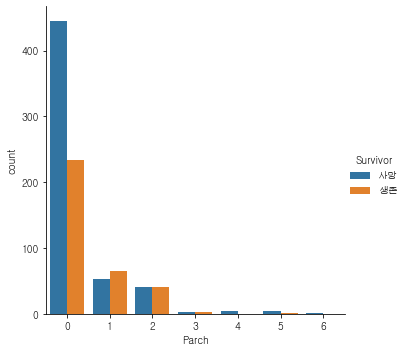

In [20]:
#자식이 많을수록 사망율 낮다
visualizationCatplot('Parch','count','Survivor',df_train)

In [21]:
#Fare와 Pclass은 같은 피처로 볼수 있다(나중에 Fare컬럼 제거)

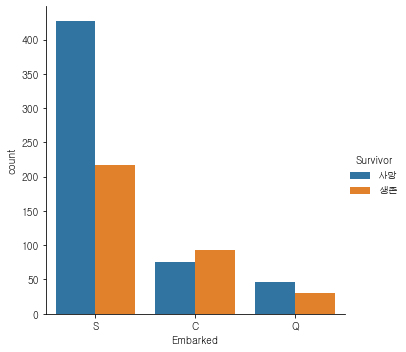

In [22]:
#S와 C에서 탑승한 사람이 사망율이 높고 Q는 사망율이 낮다
visualizationCatplot('Embarked','count','Survivor',df_train)

In [23]:
def visualization(x,data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    sns.countplot(x=x,data=data,ax=ax[0])
    ax[0].set_title(x+'별 승객수')
    ax[0].set_ylabel('승객수')
    sns.countplot(x=x,data=data,ax=ax[1],hue='Survivor')
    ax[1].set_title(x+':생존다 VS 사망자')
    ax[1].set_ylabel('승객수')
    plt.show()

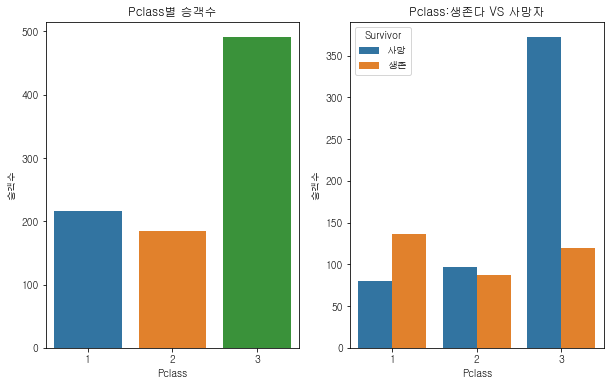

In [24]:
visualization('Pclass',df_train)

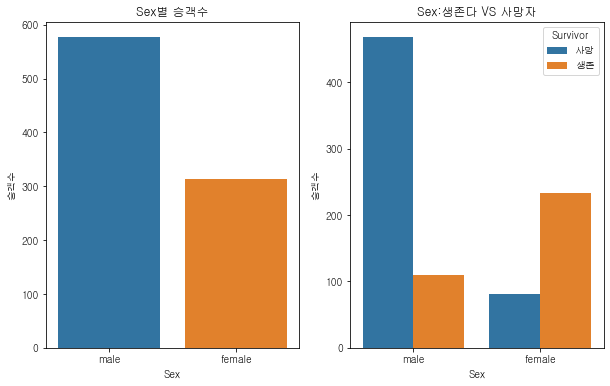

In [25]:
visualization('Sex',df_train)

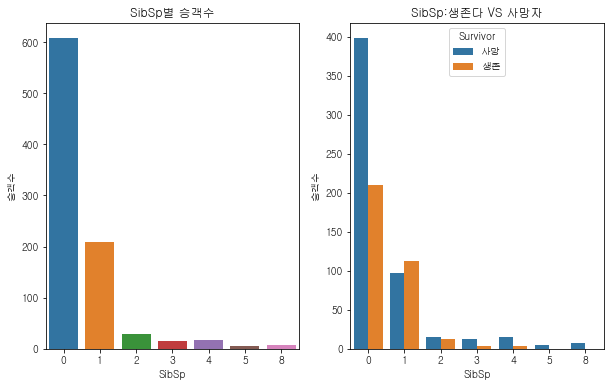

In [26]:
visualization('SibSp',df_train)

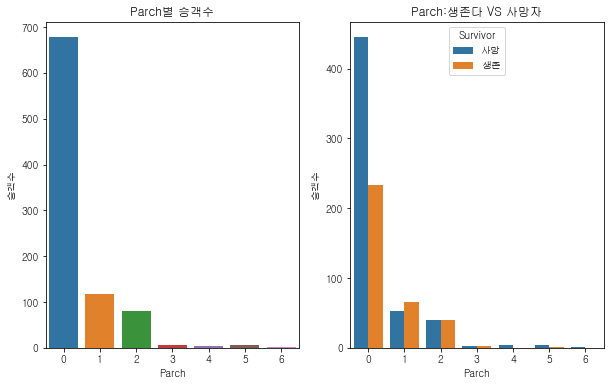

In [27]:
visualization('Parch',df_train)

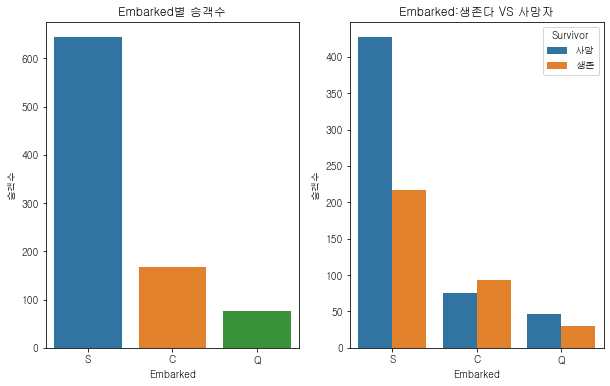

In [28]:
visualization('Embarked',df_train)#아래 그래프 다시보니 승선항구와 생존의 상관관계가 없다

In [29]:
#아래 컬럼만으로 'Survived' 피처와 다른 피처간의  상관관계 파악
df_corr=df_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Embarked']]

<AxesSubplot:>

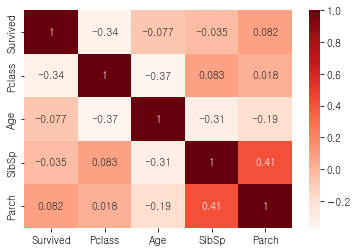

In [30]:
sns.heatmap(df_corr.corr(),cmap='Reds',annot=True)

In [31]:
'''
1. PassengerId,Ticket,Cabin과 Ticket,Fare(Pclass와 동일하고 간주),Survived 컬럼은 삭제.(값이 비어있고 연관성이 없다는 판단하에)
2. Embarked, Name, Sex 값은 숫자로 변경
3. Age의 Null 데이터를 채워 넣기
4. Age의 값의 범위를 줄이기.(큰 범위는 머신러닝 분석시 좋지 않다.(계산량이 많아 속도에 문제가 있음)
'''

'\n1. PassengerId,Ticket,Cabin과 Ticket,Fare(Pclass와 동일하고 간주),Survived 컬럼은 삭제.(값이 비어있고 연관성이 없다는 판단하에)\n2. Embarked, Name, Sex 값은 숫자로 변경\n3. Age의 Null 데이터를 채워 넣기\n4. Age의 값의 범위를 줄이기.(큰 범위는 머신러닝 분석시 좋지 않다.(계산량이 많아 속도에 문제가 있음)\n'

In [32]:
'''
[수치형 데이터 전처리]

각 열(변수, 피처, 속성)이 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 
범위를 일정한 범위로 맞추는 작업

Normalization(정규화) 와 Standardization(표준화)
데이터 분석을 수행하면서 많이 겪는 문제중 하나가 데이터 단위의 불일치임
칼럼간에 데이터의 단위가 다르면 칼럼마다 스케일이 크게 차이가 나게 되고 분석 결과에 영향을 주게 된다.
이를 해결하는 방법으로 Normalization(정규화)과 Standardization(표준화)가 있음
[ 정규화(normalization)]
데이터의 상대적 크기에 대한 영향을 줄이기 위해 데이터범위를 0~1로 변환 - MinMax스케일러라고도 함
2개 이상의 대상 컬럼(변수, 피쳐, 속성)의 단위가 다를 때 대상 데이터를 같은 기준으로 볼 수 있게 함
식 : (측정값 - 최소값) / (최대값 - 최소값)
sklearn.preprocessing의 MinMaxScaler 사용

[표준화(Standardization)] - Z-score 표준화라고도 함
피쳐의 값들이 평균이 0이고 표준편차가 1인 범위(표준정규분포)에 있도록 변환¶
데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는 outlier로 간주, 제거
특히 SVM이나 선형회귀, 로지스틱 회귀 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를때 성능이 좋은 모델이기 때문에
표준화를 하면 대부분의 경우 성능이 향상
데이터를 0을 중심으로 양쪽으로 데이터를 분포시키는 방법
표준화를 하면 각 데이터들이 평균을 기준으로 얼마나 떨여져 있는지를 나타내는 값으로 변환됨
식(Z-score 표준화) : (측정값 - 평균) / 표준편차

'''

'\n[수치형 데이터 전처리]\n\n각 열(변수, 피처, 속성)이 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 \n범위를 일정한 범위로 맞추는 작업\n\nNormalization(정규화) 와 Standardization(표준화)\n데이터 분석을 수행하면서 많이 겪는 문제중 하나가 데이터 단위의 불일치임\n칼럼간에 데이터의 단위가 다르면 칼럼마다 스케일이 크게 차이가 나게 되고 분석 결과에 영향을 주게 된다.\n이를 해결하는 방법으로 Normalization(정규화)과 Standardization(표준화)가 있음\n[ 정규화(normalization)]\n데이터의 상대적 크기에 대한 영향을 줄이기 위해 데이터범위를 0~1로 변환 - MinMax스케일러라고도 함\n2개 이상의 대상 컬럼(변수, 피쳐, 속성)의 단위가 다를 때 대상 데이터를 같은 기준으로 볼 수 있게 함\n식 : (측정값 - 최소값) / (최대값 - 최소값)\nsklearn.preprocessing의 MinMaxScaler 사용\n\n[표준화(Standardization)] - Z-score 표준화라고도 함\n피쳐의 값들이 평균이 0이고 표준편차가 1인 범위(표준정규분포)에 있도록 변환¶\n데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는 outlier로 간주, 제거\n특히 SVM이나 선형회귀, 로지스틱 회귀 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를때 성능이 좋은 모델이기 때문에\n표준화를 하면 대부분의 경우 성능이 향상\n데이터를 0을 중심으로 양쪽으로 데이터를 분포시키는 방법\n표준화를 하면 각 데이터들이 평균을 기준으로 얼마나 떨여져 있는지를 나타내는 값으로 변환됨\n식(Z-score 표준화) : (측정값 - 평균) / 표준편차\n\n'

## 데이타 전처리

#### 정답 데이타 분리

In [33]:
#정답 데이타 분리
y_train_test = df_train['Survived']

In [34]:
y_train_test

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### 피처에서 제외할 컬럼 삭제

In [35]:
#훈련에서 제외할 피처 삭제:'Survived'(정답 데이타로 이미 분리),'Survivor'(시각화용) 
df_train.drop(['PassengerId','Ticket','Fare','Cabin','Survived','Survivor'],axis=1,inplace=True)

In [36]:
df_train

Pclass                                               Name     Sex   Age  \
0         3                            Braund, Mr. Owen Harris    male  22.0   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2         3                             Heikkinen, Miss. Laina  female  26.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4         3                           Allen, Mr. William Henry    male  35.0   
..      ...                                                ...     ...   ...   
886       2                              Montvila, Rev. Juozas    male  27.0   
887       1                       Graham, Miss. Margaret Edith  female  19.0   
888       3           Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
889       1                              Behr, Mr. Karl Howell    male  26.0   
890       3                                Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch Embarked  
0        1      0        S  
1        1      0        C  
2        0      0        S  
3        1      0        S  
4        0      0        S  
..     ...    ...      ...  
886      0      0        S  
887      0      0        S  
888      1      2        S  
889      0      0        C  
890      0      0        Q  

[891 rows x 7 columns]

#### 이름 전처리하기

In [37]:
#이름의 타이틀을 통해 승객의 성별이나 나이대, 결혼 유무를 알 수가 있다.
'''
Don / Dona: = sir(상류층)
Mme : Madame(기혼여성)
Capt : Captain(대위(미국) 혹은 대령(영국))
Lady : 상류층 숙녀
the Countess : Countess(여자 백작)
mlle : Mademoiselle(미혼 여성 또는 젊은 여성)
Jonkhee : (네덜란드의) 작위 없는 귀족
Rev : 목사/신부
Col : 군인 관련
Master : Master는 뜻이 많다.
Major : 소령
'''
#이름에서 Mr,Miss등만 가져와서 리스트로 변환
name_title_series=df_train['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
name_title = name_title_series.unique().tolist()

In [38]:
name_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [39]:
#name_title컬럼 추가
df_train['name_title'] = name_title_series
len(df_train['name_title'].unique())#17
df_train['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [40]:
df_train

Pclass                                               Name     Sex   Age  \
0         3                            Braund, Mr. Owen Harris    male  22.0   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2         3                             Heikkinen, Miss. Laina  female  26.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4         3                           Allen, Mr. William Henry    male  35.0   
..      ...                                                ...     ...   ...   
886       2                              Montvila, Rev. Juozas    male  27.0   
887       1                       Graham, Miss. Margaret Edith  female  19.0   
888       3           Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
889       1                              Behr, Mr. Karl Howell    male  26.0   
890       3                                Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch Embarked name_title  
0        1      0        S         Mr  
1        1      0        C        Mrs  
2        0      0        S       Miss  
3        1      0        S        Mrs  
4        0      0        S         Mr  
..     ...    ...      ...        ...  
886      0      0        S        Rev  
887      0      0        S       Miss  
888      1      2        S       Miss  
889      0      0        C         Mr  
890      0      0        Q         Mr  

[891 rows x 8 columns]

In [41]:
#분류가 너무 많으므로 비슷한 것끼리 묶어서 줄이자
#리스트를 맵으로 뱐환(map()함수에서 사용하기 위함)
#탑승자중 드문 등급은 Rare로
name_title ={'Mr':'Mr','Mrs':'Mrs','Miss':'Miss','Master':'Rare','Don':'Royal','Rev':'Rare','Dr':'Rare','Mme':'Mrs','Ms':'Miss','Major':'Rare','Lady':'Royal','Sir':'Royal','Mlle':'Miss','Col':'Rare','Capt':'Rare','the Countess':'Royal','Jonkheer':'Rare'}

In [42]:
df_train['name_title']=df_train['name_title'].map(name_title)
len(df_train['name_title'].unique())
df_train['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare', 'Royal'], dtype=object)

In [43]:
df_train

Pclass                                               Name     Sex   Age  \
0         3                            Braund, Mr. Owen Harris    male  22.0   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2         3                             Heikkinen, Miss. Laina  female  26.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4         3                           Allen, Mr. William Henry    male  35.0   
..      ...                                                ...     ...   ...   
886       2                              Montvila, Rev. Juozas    male  27.0   
887       1                       Graham, Miss. Margaret Edith  female  19.0   
888       3           Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
889       1                              Behr, Mr. Karl Howell    male  26.0   
890       3                                Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch Embarked name_title  
0        1      0        S         Mr  
1        1      0        C        Mrs  
2        0      0        S       Miss  
3        1      0        S        Mrs  
4        0      0        S         Mr  
..     ...    ...      ...        ...  
886      0      0        S       Rare  
887      0      0        S       Miss  
888      1      2        S       Miss  
889      0      0        C         Mr  
890      0      0        Q         Mr  

[891 rows x 8 columns]

#### NaN인 Age컬럼들 전처리

In [44]:
#이름의 타이틀 평균값으로 Age가 NaN인 데이타 채우기
age_mean=df_train.groupby('name_title')['Age'].mean()

In [45]:
#df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Miss'),['Age','name_title']]
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Mr'),['Age']]=age_mean['Mr']
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Mrs'),['Age']]=age_mean['Mrs']
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Miss'),['Age']]=age_mean['Miss']
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Rare'),['Age']]=age_mean['Rare']
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Royal'),['Age']]=age_mean['Royal']

In [46]:
df_train['Age'].isnull().sum()#0

0

#### NaN인 Embarked컬럼들 전처리

In [47]:
#df_train.isnull().sum()
#Embarked 결측치는 S로 채우자.왜냐하면 가장 빈도수가 높은 값이다

In [48]:
df_train['Embarked'].fillna('S',inplace =True)

In [49]:
df_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'name_title'],
      dtype='object')

#### 학습에서 제외할 피처(Name) 추가 삭제

In [50]:
df_train.drop(['Name'],axis=1,inplace=True)
df_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'name_title'], dtype='object')

In [51]:
df_train.head(5)

Pclass     Sex   Age  SibSp  Parch Embarked name_title
0       3    male  22.0      1      0        S         Mr
1       1  female  38.0      1      0        C        Mrs
2       3  female  26.0      0      0        S       Miss
3       1  female  35.0      1      0        S        Mrs
4       3    male  35.0      0      0        S         Mr

#### 범주형 데이타 인코딩

In [52]:
#Sex 숫자로 변경(레이블 인코딩 혹은 원핫 인코딩):레이블 인코딩과 같다
df_train['Sex'] = df_train['Sex'].map({'male':0,'female':1})

In [53]:
df_train.head(5)

Pclass  Sex   Age  SibSp  Parch Embarked name_title
0       3    0  22.0      1      0        S         Mr
1       1    1  38.0      1      0        C        Mrs
2       3    1  26.0      0      0        S       Miss
3       1    1  35.0      1      0        S        Mrs
4       3    0  35.0      0      0        S         Mr

In [54]:
#Embarked는 더미화(원핫 인코딩)
embarked_onehot=pd.get_dummies(df_train['Embarked'],prefix='Embarked')

In [55]:
embarked_onehot

Embarked_C  Embarked_Q  Embarked_S
0             0           0           1
1             1           0           0
2             0           0           1
3             0           0           1
4             0           0           1
..          ...         ...         ...
886           0           0           1
887           0           0           1
888           0           0           1
889           1           0           0
890           0           1           0

[891 rows x 3 columns]

In [56]:
#원핫 인코딩된 데이타 프레임을 df_train에 합치기(수평으로 합친다)
df_train=pd.concat([df_train,embarked_onehot],axis=1)
df_train

Pclass  Sex        Age  SibSp  Parch Embarked name_title  Embarked_C  \
0         3    0  22.000000      1      0        S         Mr           0   
1         1    1  38.000000      1      0        C        Mrs           1   
2         3    1  26.000000      0      0        S       Miss           0   
3         1    1  35.000000      1      0        S        Mrs           0   
4         3    0  35.000000      0      0        S         Mr           0   
..      ...  ...        ...    ...    ...      ...        ...         ...   
886       2    0  27.000000      0      0        S       Rare           0   
887       1    1  19.000000      0      0        S       Miss           0   
888       3    1  21.845638      1      2        S       Miss           0   
889       1    0  26.000000      0      0        C         Mr           1   
890       3    0  32.000000      0      0        Q         Mr           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 10 columns]

#### 학습에서 제외할 피처(Embarked,name_title) 추가 삭제

In [57]:
df_train.drop(['Embarked','name_title'],axis=1,inplace=True)
df_train

Pclass  Sex        Age  SibSp  Parch  Embarked_C  Embarked_Q  Embarked_S
0         3    0  22.000000      1      0           0           0           1
1         1    1  38.000000      1      0           1           0           0
2         3    1  26.000000      0      0           0           0           1
3         1    1  35.000000      1      0           0           0           1
4         3    0  35.000000      0      0           0           0           1
..      ...  ...        ...    ...    ...         ...         ...         ...
886       2    0  27.000000      0      0           0           0           1
887       1    1  19.000000      0      0           0           0           1
888       3    1  21.845638      1      2           0           0           1
889       1    0  26.000000      0      0           1           0           0
890       3    0  32.000000      0      0           0           1           0

[891 rows x 8 columns]

#### 나이컬럼 정규화(스케일링)

In [58]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscale#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()#MinMaxScaler객체 생성
minmax = df_train[['Age','SibSp','Parch']]#나이 와 형제 자매수,자식수을 0에서 1사이로 스케일링

In [60]:
scaler.fit(minmax)#데이타 훈련

MinMaxScaler()

In [61]:
scaler.data_max_ #각 컬럼별 최대값 데이타

array([80.,  8.,  6.])

In [62]:
minmax_scale=scaler.transform(minmax)#데이타 변환

In [63]:
minmax_scale[:,0]

array([0.27117366, 0.4722292 , 0.32143755, 0.43453129, 0.43453129,
       0.40145879, 0.67328474, 0.01985423, 0.33400352, 0.17064589,
       0.04498618, 0.72354863, 0.24604172, 0.48479517, 0.17064589,
       0.68585072, 0.01985423, 0.40145879, 0.3842674 , 0.44444573,
       0.43453129, 0.42196532, 0.18321186, 0.34656949, 0.09525006,
       0.4722292 , 0.40145879, 0.23347575, 0.26923395, 0.40145879,
       0.49736115, 0.44444573, 0.26923395, 0.8240764 , 0.34656949,
       0.52249309, 0.40145879, 0.25860769, 0.22090978, 0.17064589,
       0.49736115, 0.33400352, 0.40145879, 0.03242021, 0.23347575,
       0.40145879, 0.40145879, 0.26923395, 0.40145879, 0.22090978,
       0.08268409, 0.25860769, 0.61045489, 0.35913546, 0.81151043,
       0.40145879, 0.25860769, 0.35285248, 0.05755215, 0.13294798,
       0.27117366, 0.4722292 , 0.560191  , 0.04498618, 0.40145879,
       0.22665056, 0.35913546, 0.23347575, 0.2083438 , 0.32143755,
       0.39683338, 0.19577783, 0.25860769, 0.32143755, 0.39683

In [64]:
df_train['Age']=minmax_scale[:,0]#스케일링된 데이타로 Age 데이타 변경

In [65]:
df_train['SibSp']=minmax_scale[:,1]#스케일링된 데이타로 SibSp 데이타 변경

In [66]:
df_train['Parch']=minmax_scale[:,2]#스케일링된 데이타로 SibSp 데이타 변경

In [67]:
df_train.head()

Pclass  Sex       Age  SibSp  Parch  Embarked_C  Embarked_Q  Embarked_S
0       3    0  0.271174  0.125    0.0           0           0           1
1       1    1  0.472229  0.125    0.0           1           0           0
2       3    1  0.321438  0.000    0.0           0           0           1
3       1    1  0.434531  0.125    0.0           0           0           1
4       3    0  0.434531  0.000    0.0           0           0           1

#### 훈련 및 테스트 데이타 분리

In [68]:
import math
split=math.ceil(len(df_train)*0.8)
print(split)
#테스트에 사용할 데이타
x_train=df_train.iloc[:split]#첫행 부터 713행까지
y_train=y_train_test[:split]
#테스트에 사용할 데이타
x_test=df_train.iloc[split:]#713행부터 끝까지
y_test=y_train_test[split:]

713


#### 머신러닝 모델로  학습시키기

In [69]:
#머신러닝 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [70]:
from sklearn import metrics#모델의 성능을 평가하기위한 모듈

In [71]:
#3개의 머신러닝 모델을 훈련하고 예측하기위한 함수
def fit_predict(model,algorithm_title,x_train,y_train,x_test,y_test):
    '''
    model : 머신러닝 모델 객체
    algorithm_title : 모델명
    x_train,y_train: 모델 훈련에 사용할 훈련데이타 및 정답데이타
    x_test,y_test : 성능 측정에 사용할 테스트 데이타 및 정답데이타
    '''
    #훈련 데이타로 모델 학습시키기
    model.fit(x_train,y_train)
    #학습된 모델로 새로운 데이타(테스트 데이타)로 예측
    y_pred=model.predict(x_test)#테스트 데이타로 예측한 정답을 반환
    #맞힌 개수와 정답 데이타(y_test) 갯수로 수식 이용해서 정확도 계산하기: 수동으로 계산
    print((y_test == y_pred).sum()/len(y_pred) * 100,'%',sep='')
    #사이킷런의 함수 사용해서 정확도 계산(성능측정)
    acc = metrics.accuracy_score(y_test,y_pred)
    print('학습 알고리즘 : ',algorithm_title,' 정확도 : ',acc*100,'%',sep='')
    

In [72]:
##정의한 함수 미사용해서 훈련 및 예측
lr = LogisticRegression(max_iter=500)#머신러닝 모델 생성  . max_iter 디폴트는 100 수렴하지 못했다고 경고 뜸

In [73]:
lr.fit(x_train,y_train)#모델 훈련(학습)

LogisticRegression(max_iter=500)

In [74]:
y_pred=lr.predict(x_test)

In [75]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [76]:
(y_pred == y_test).sum()/len(y_pred) * 100

83.14606741573034

In [77]:
acc = metrics.accuracy_score(y_test,y_pred)
print('학습 알고리즘 : 로지스틱 리그레션 정확도 : ',acc*100,'%',sep='')

학습 알고리즘 : 로지스틱 리그레션 정확도 : 83.14606741573034%


In [84]:
##정의한 함수 사용
fit_predict(SVC(max_iter=600),'서포트 벡터 머신',x_train,y_train,x_test,y_test)

83.14606741573034%
학습 알고리즘 : 서포트 벡터 머신 정확도 : 83.14606741573034%


In [86]:
fit_predict(RandomForestClassifier(n_estimators=500),'랜덤 포레스트',x_train,y_train,x_test,y_test)

84.8314606741573%
학습 알고리즘 : 랜덤 포레스트 정확도 : 84.8314606741573%
